<a href="https://colab.research.google.com/github/Shatha-1/IT326-Project/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading
Load the Preprocessed Data and the necessary libraries.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

df = pd.read_csv("Preprocessed_DataSet.csv")
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    float64
 1   Age                                    502 non-null    float64
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    float64
 5   Dietary Habits                         502 non-null    float64
 6   Have you ever had suicidal thoughts ?  502 non-null    float64
 7   Study Hours                            502 non-null    float64
 8   Financial Stress                       502 non-null    float64
 9   Family History of Mental Illness       502 non-null    float64
 10  Depression                             502 non-null    float64
dtypes: flo

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1.0,0.6250,0.25,0.75,1.0,1.0,1.0,0.750000,0.25,1.0,0.0
1,1.0,0.6250,0.75,1.00,0.0,0.0,1.0,0.583333,0.00,1.0,0.0
2,1.0,0.4375,0.00,0.50,0.0,2.0,1.0,0.833333,0.75,0.0,1.0
3,1.0,0.3125,0.00,0.75,3.0,2.0,1.0,0.583333,0.25,1.0,0.0
4,0.0,0.8125,0.00,1.00,3.0,0.0,1.0,0.333333,0.25,1.0,0.0


#Define the dependent and independent variables

In [ ]:
#Separate Features and Target

X = df.drop("Depression", axis=1)
y = df["Depression"]






*   The independent variables (X) represent all the input attributes used by the model to learn patterns. These include factors such as academic pressure, sleep duration, study satisfaction, and other mental-health-related measurements.
*   The dependent variable (y) is the outcome we want to predict — in this case, the Depression status of each student (0 = Not depressed, 1 = Depressed).



#Training and Evaluating Decision Tree (Gini) Across Different Train-Test Splits

In [ ]:
# Define train/test splits
splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3)]
results = []

for train_ratio, test_ratio in splits:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_ratio, random_state=42
    )

     # Train Decision Tree (Gini)
    model = DecisionTreeClassifier(criterion="gini", random_state=45)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Accuracy
    acc = model.score(X_test, y_test)

     # Save results
    results.append([f"{int(train_ratio*100)}/{int(test_ratio*100)}", acc])

    # Create results table
    results_df = pd.DataFrame(results, columns=["Train/Test Split", "Accuracy"])
results_df

,Train/Test Split,Accuracy
0,90/10,0.862745
1,80/20,0.900990
2,70/30,0.847682


we train a Decision Tree classifier using the Gini impurity measure on three different train-test partitions: 90/10, 80/20, and 70/30. For each split, the model is trained on the training data and then evaluated on the unseen test data to measure its generalization performance. The accuracy for each partition is recorded in a results table

#Visualize confusion matrices

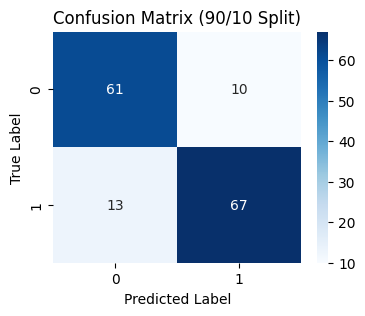

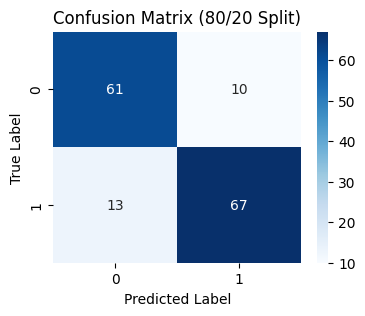

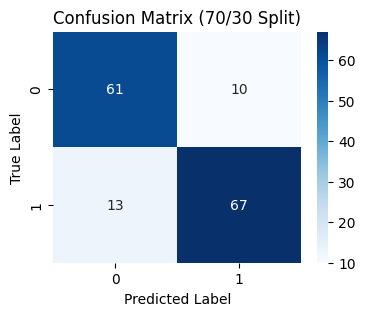

In [ ]:



for train_ratio, test_ratio in splits:


    y_pred = model.predict(X_test)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix ({int(train_ratio*100)}/{int(test_ratio*100)} Split)")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


#Gini Decision Tree

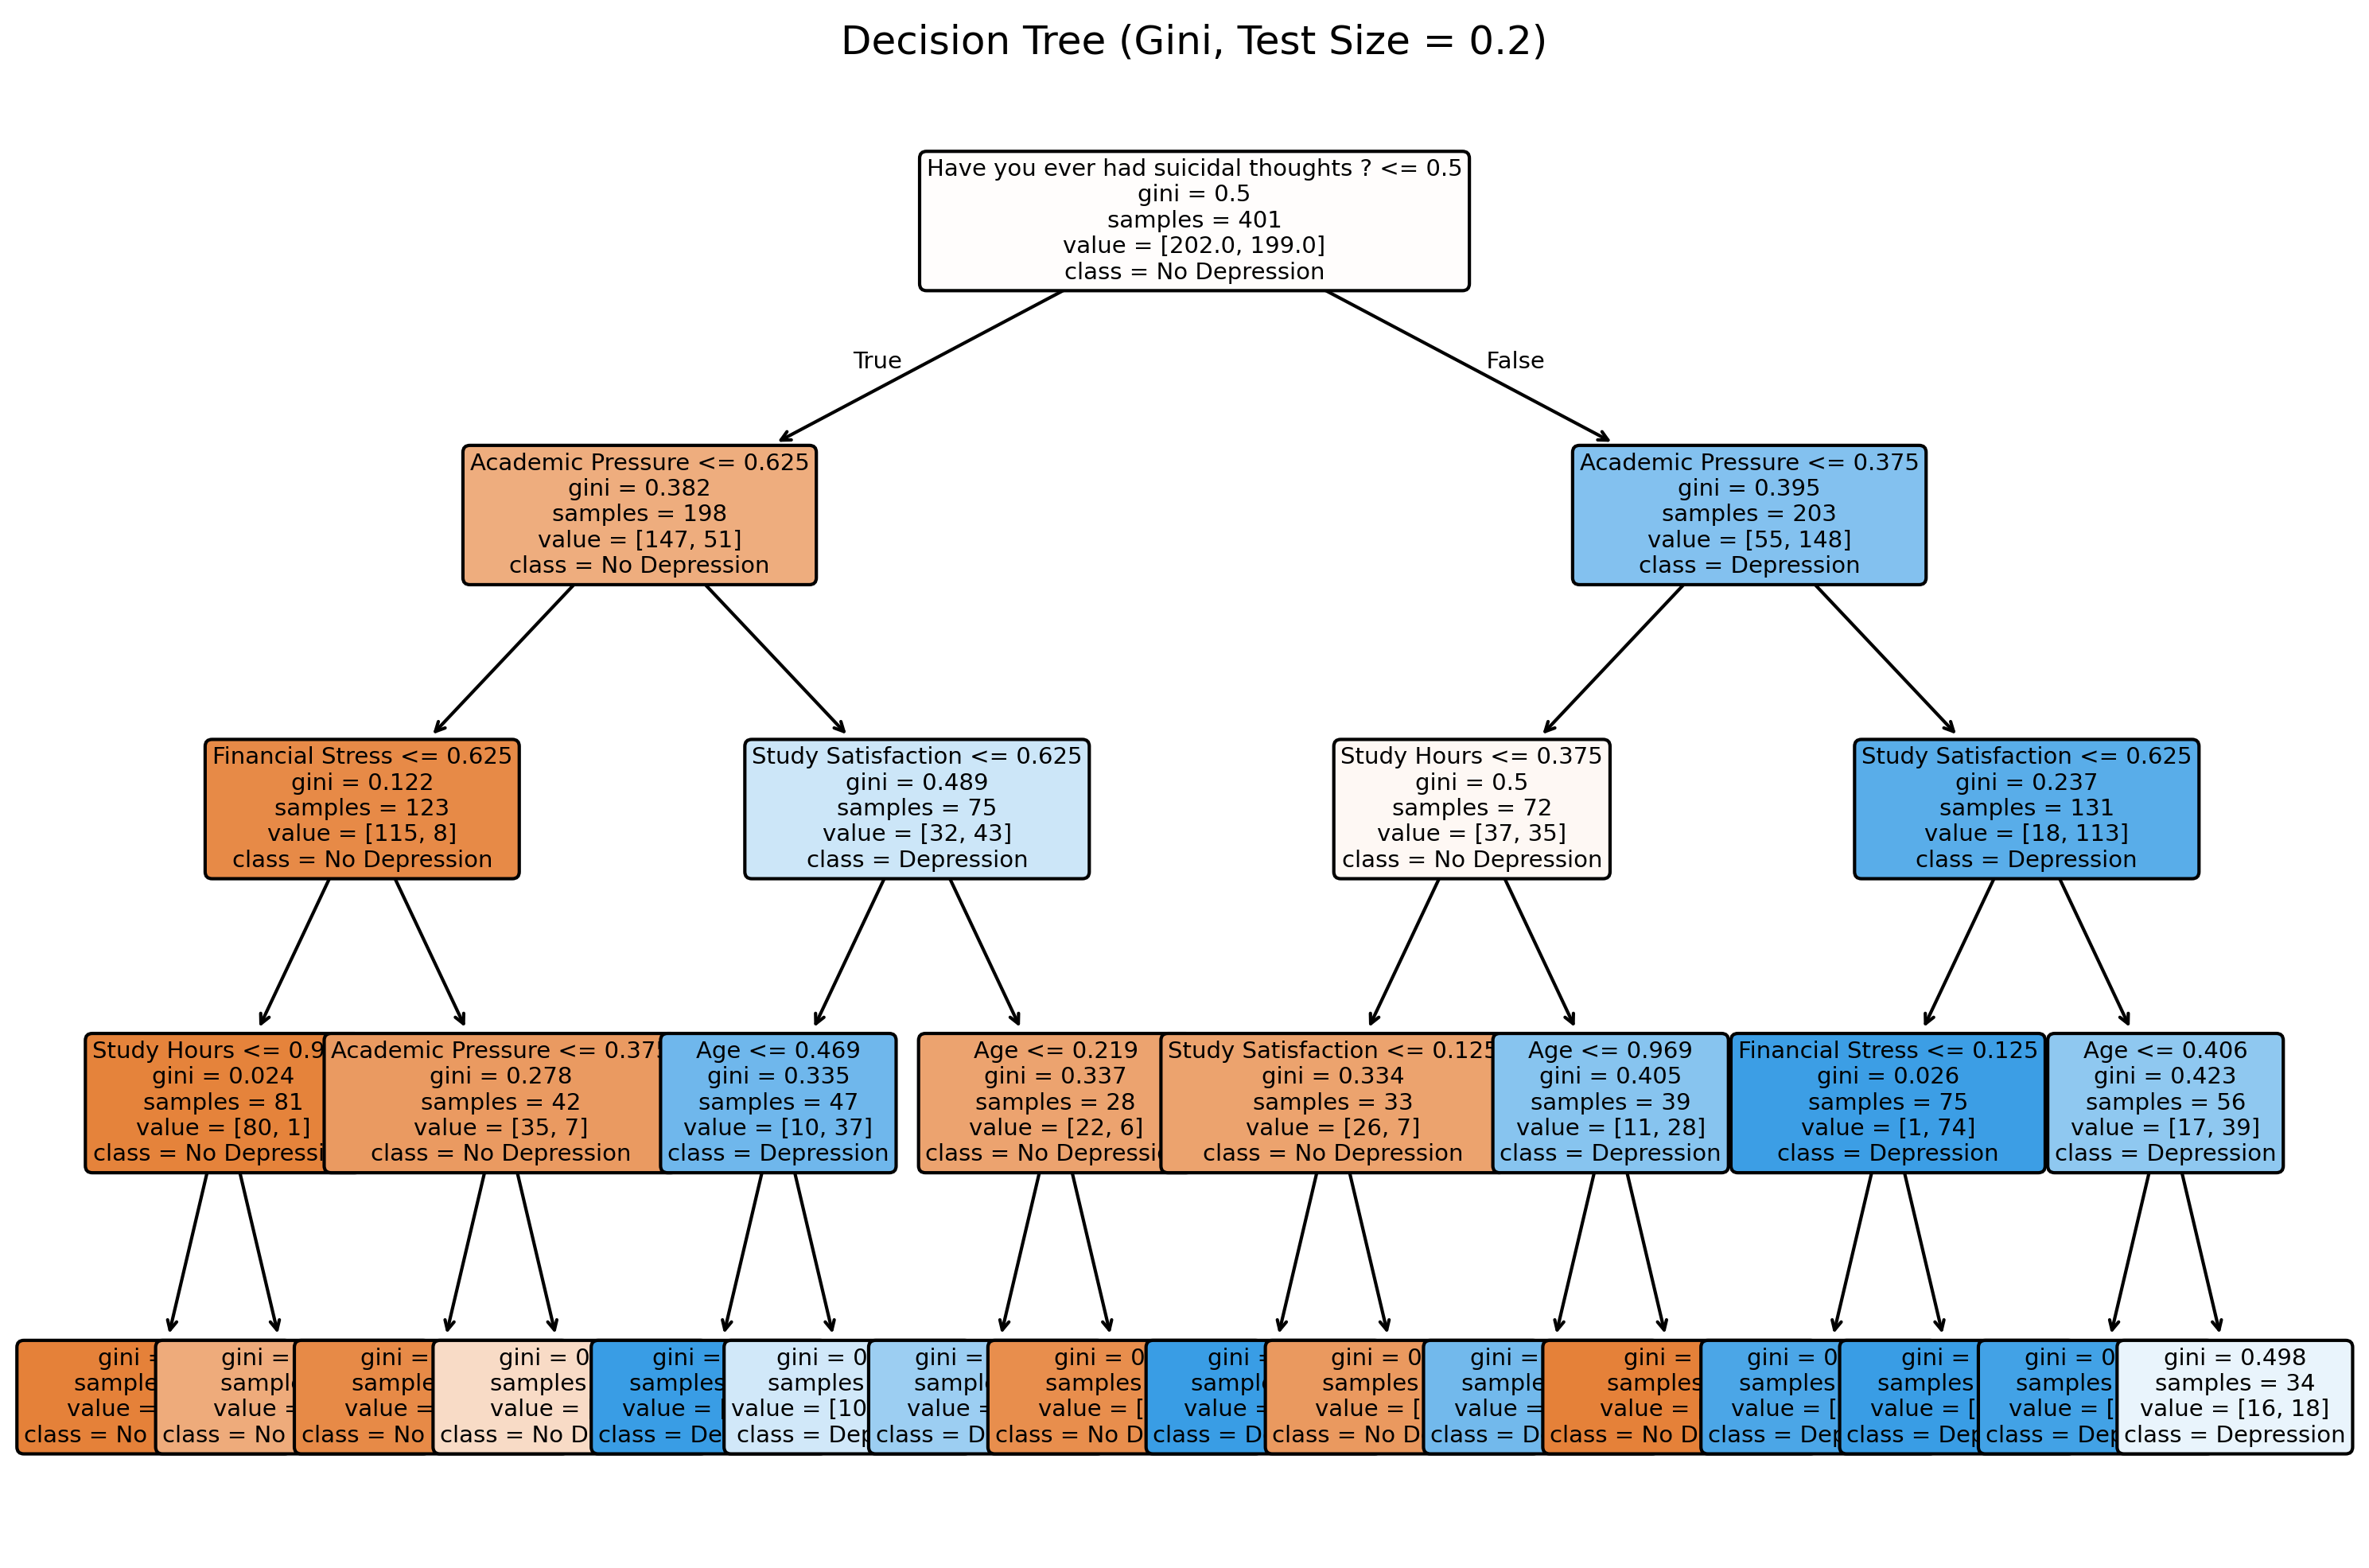

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Train-test split (same as your friend)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Decision Tree using Gini index (default)
clf_gini = DecisionTreeClassifier(
    criterion="gini",   # ← changed from entropy
    max_depth=4,        # same as your friend
    random_state=42
)

# Train the model
clf_gini.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(12, 8), dpi=300)
plot_tree(
    clf_gini,
    feature_names=X.columns,
    class_names=["No Depression", "Depression"],
    filled=True,
    fontsize=7,
    rounded=True
)

plt.title("Decision Tree (Gini, Test Size = 0.2)")
plt.show()



The tree shows that the strongest predictor of depression is whether the student has had suicidal thoughts, which appears at the root. From there, the model uses factors like academic pressure, study satisfaction, financial stress, study hours, and age to separate depressed from non-depressed students. Overall, the left side of the tree mostly leads to “No Depression,” while the right side—driven by higher academic pressure and lower study satisfaction—leads to “Depression.” This indicates that mental health indicators and academic stress are the most influential features in the dataset.

The confusion matrices across the three splits show a consistently high number of correct predictions, with only a few misclassifications. This indicates that the Decision Tree model performs reliably and generalizes well across different training sizes.

In [ ]:
entropy_results = []

for train_ratio, test_ratio in splits:


    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_ratio, random_state=42
    )

    # Initialize and train Decision Tree (Entropy) model
    model_entropy = DecisionTreeClassifier(criterion="entropy", random_state=45)
    model_entropy.fit(X_train, y_train)

    # Predict & Calculate Accuracy
    y_pred_entropy = model_entropy.predict(X_test)
    acc_entropy = model_entropy.score(X_test, y_test)

    # Store results
    entropy_results.append([f"{int(train_ratio*100)}/{int(test_ratio*100)}", acc_entropy])

# Create accuracy table
entropy_results_df = pd.DataFrame(entropy_results, columns=["Train/Test Split", "Accuracy"])
entropy_results_df

,Train/Test Split,Accuracy
0,90/10,0.862745
1,80/20,0.910891
2,70/30,0.841060


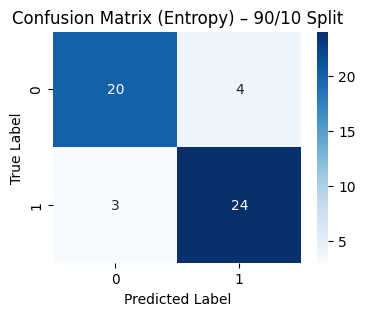

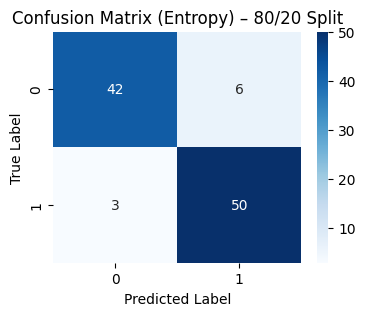

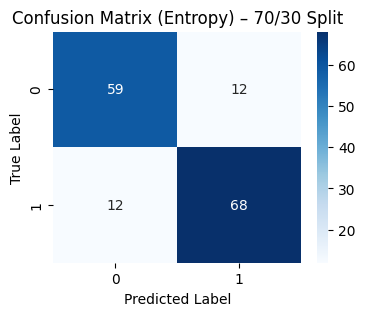

In [ ]:
for train_ratio, test_ratio in splits:

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_ratio, random_state=42
    )

    model_entropy = DecisionTreeClassifier(criterion="entropy", random_state=45)
    model_entropy.fit(X_train, y_train)

    y_pred_entropy = model_entropy.predict(X_test)
    cm = confusion_matrix(y_test, y_pred_entropy)

    # Plot confusion matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix (Entropy) – {int(train_ratio*100)}/{int(test_ratio*100)} Split")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


The confusion matrices for the three splits (90/10, 80/20, and 70/30) show consistent performance of the entropy-based Decision Tree classifier. In all cases, correctly classified instances are higher than misclassified ones, and the accuracy remains similar across the different train-test ratios. This indicates that the model generalizes well and maintains stable performance regardless of the split size.

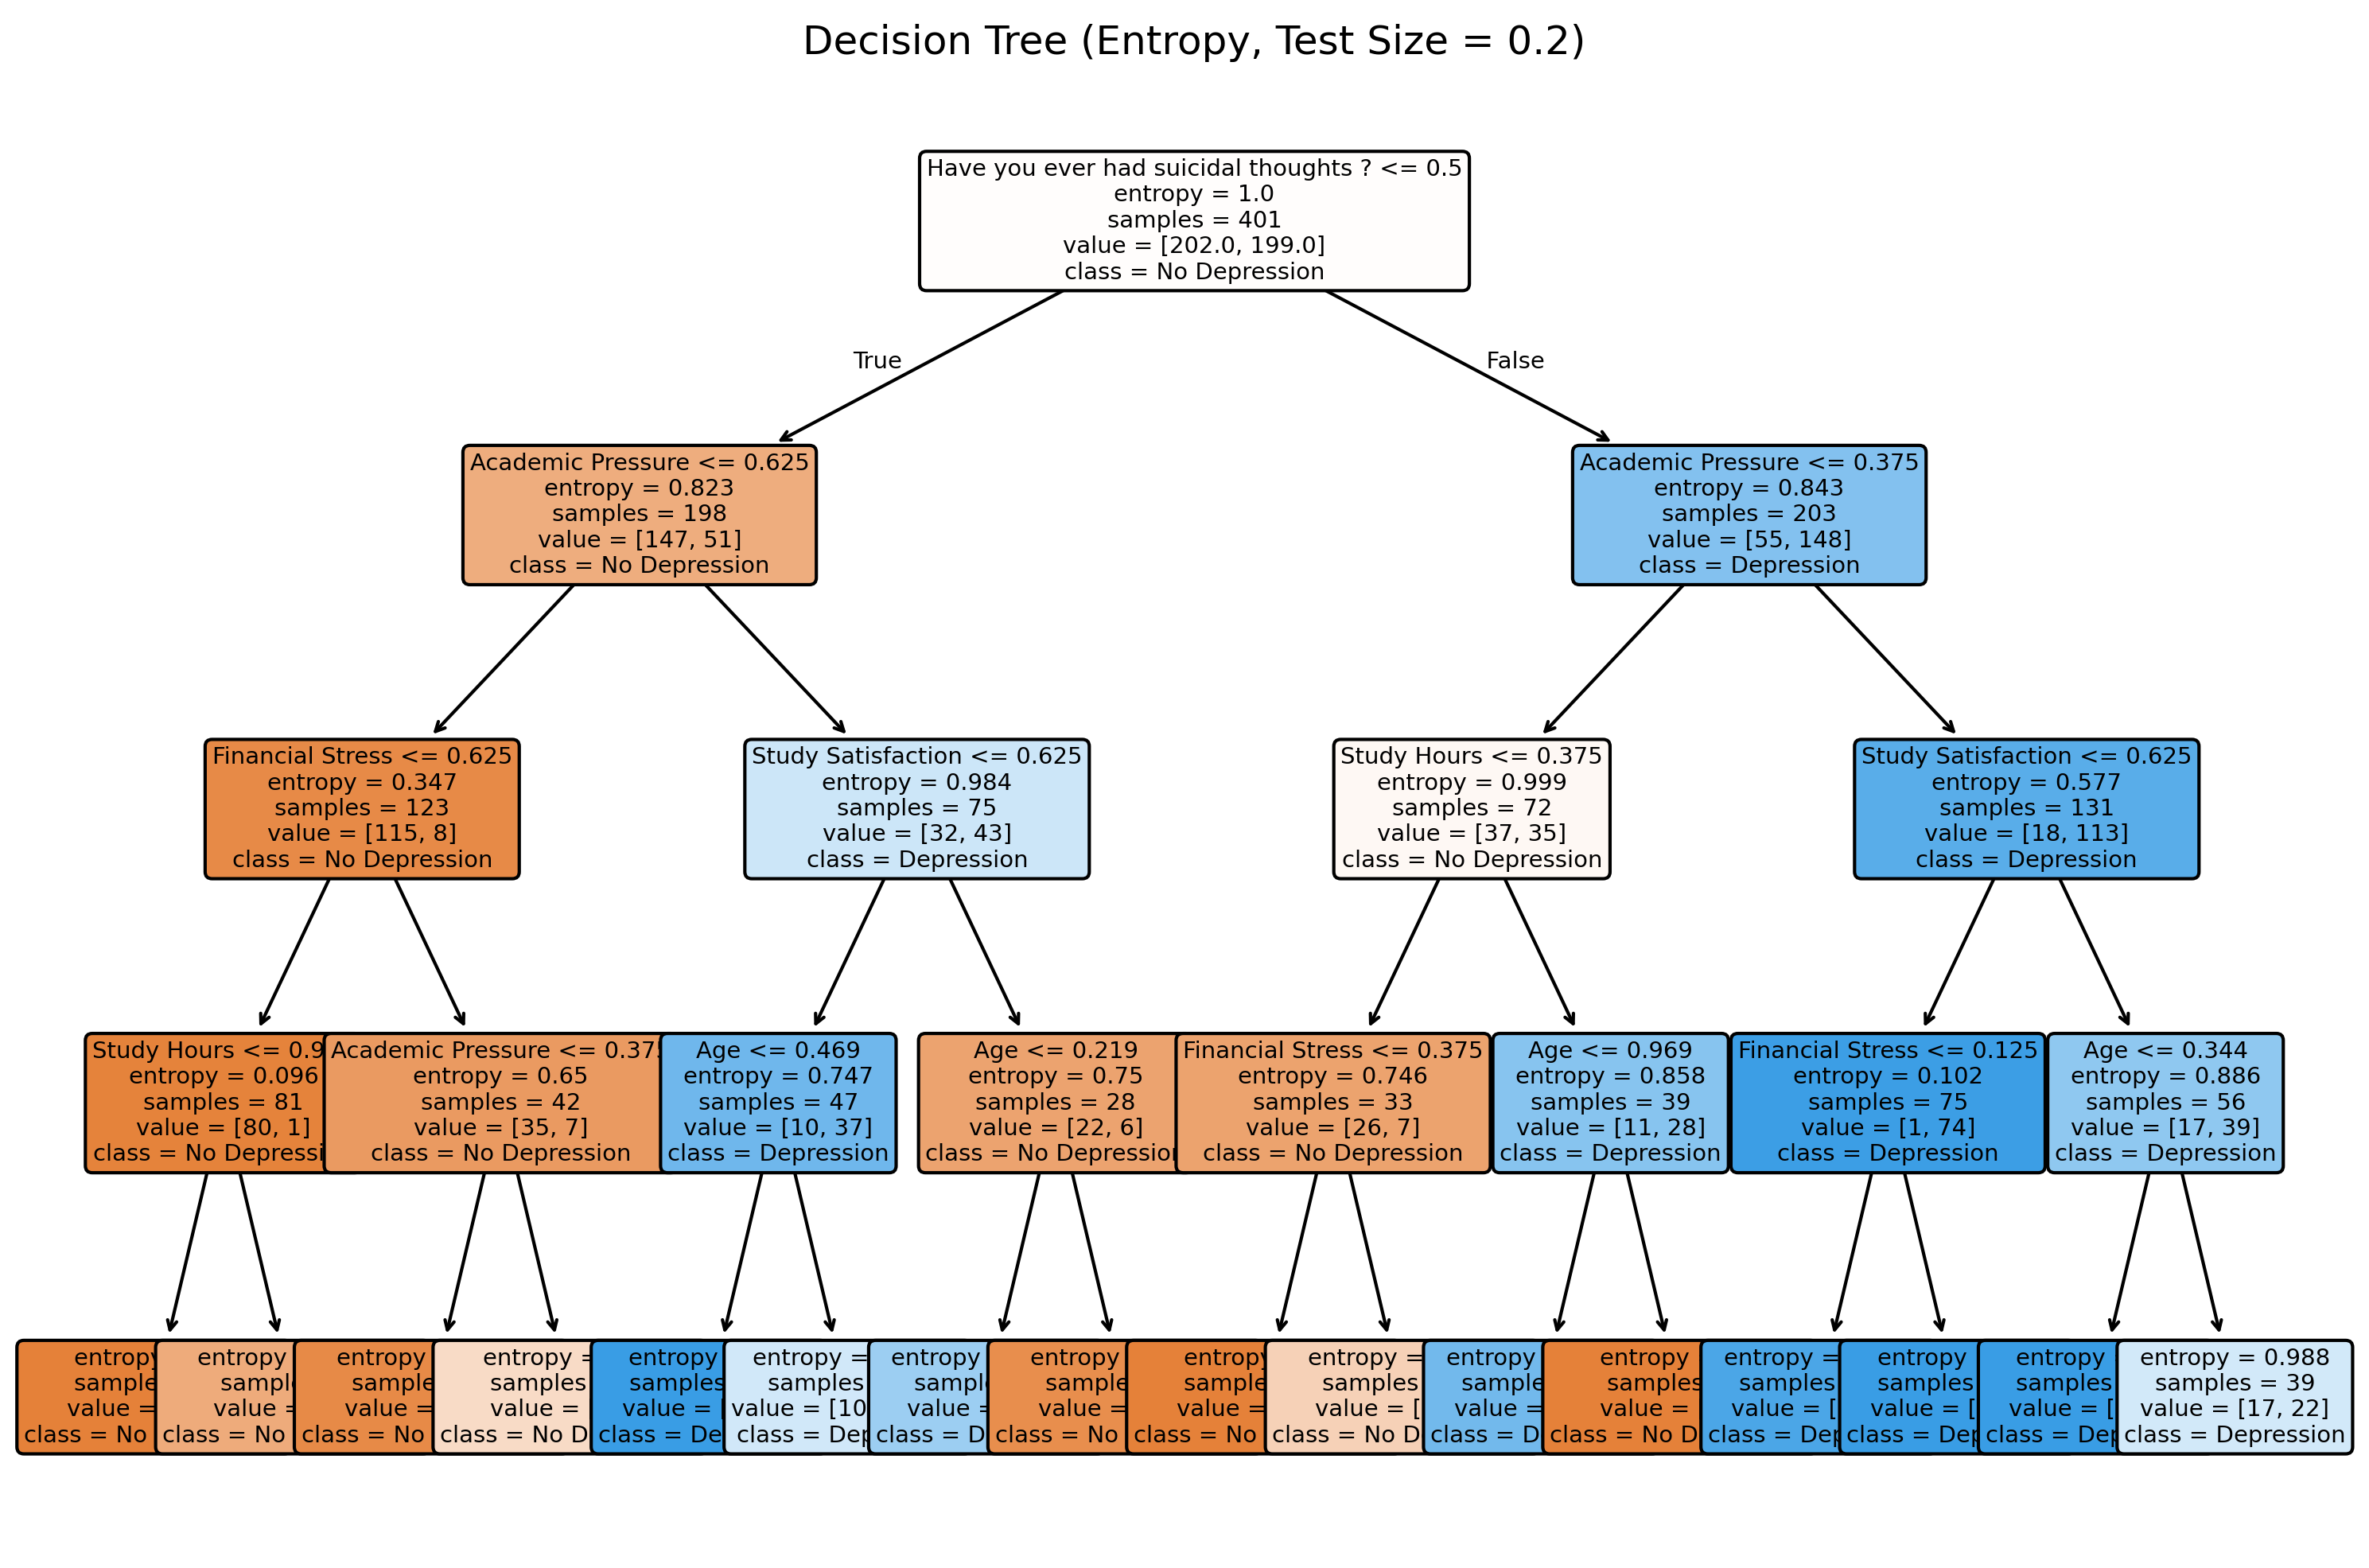

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

clf = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=4,
    random_state=42
)

clf.fit(X_train, y_train)

plt.figure(figsize=(12, 8), dpi=300)
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=["No Depression", "Depression"],
    filled=True,
    fontsize=7,
    rounded=True
)
plt.title("Decision Tree (Entropy, Test Size = 0.2)")
plt.show()


The decision tree generated using the Entropy criterion shows how the model splits the data based on the most informative features. The root node represents the attribute with the highest information gain, and the following branches apply additional rules that further separate the data. Overall, the entropy-based tree is simple, interpretable, and highlights the key features that contribute most to predicting depression.

In [ ]:
comparison_df = pd.DataFrame({
    "Train/Test Split": results_df["Train/Test Split"],
    "Gini Accuracy": results_df["Accuracy"],
    "Entropy Accuracy": entropy_results_df["Accuracy"],
})

comparison_df


## Final Analysis: Gini vs Entropy

After applying both Gini and Entropy criteria to the Decision Tree classifier across the same train/test splits (90/10, 80/20, 70/30), the results show:

*   Both criteria produce very similar accuracy values, with only slight differences.

*   Gini is known to be computationally faster because it avoids logarithmic operations.


*  Entropy can sometimes provide better splits when classes are highly informative,
but in our dataset the difference is minimal.

## Conclusion:

Both criteria perform almost equally well on this dataset.
However, because of its efficiency and nearly identical accuracy,
Gini can be considered the slightly better choice, while Entropy remains a strong alternative.

# **K-Means Clustering and Visualization**

**Data Preparation for K-Means**

In this step, we extract the numerical features and scale them using StandardScaler.  
Scaling helps the K-Means algorithm perform better by giving all features equal importance.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Extract numerical features only
features = df.drop(df.columns[0], axis=1)

# Use StandardScaler to scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

print("\nScaled DataFrame:")
print(scaled_df.head())


Applying K-Means with Different Values of K
We now apply K-Means clustering using multiple K values (2, 3, 4).  
This allows us to compare how the algorithm groups the data.

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

# Set a seed for random number generation
np.random.seed(42)

# Run k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_result = kmeans.fit(scaled_df)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)


# **Clustering visualization**

In this step, I use the silhouette plot to visually assess how clearly the data is separated into clusters and to check the overall coherence of the chosen K-Means model.

In [ ]:
%pip install yellowbrick

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

# from previous code is kmeans = KMeans(n_clusters=3, random state=42)
Visualizer = SilhouetteVisualizer(kmeans, color="yellowbrick")
Visualizer.fit(scaled_df)
print("The average silhouette score is:", Visualizer.silhouette_score_)
Visualizer.show()

The average silhouette score is: 0.12133509212350278

# **Clustering center visualization**

In this step, we apply K-Means clustering with 4 clusters to observe how the data divides into groups.

In [ ]:
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

scaled_df['Cluster'] = kmeans_result.labels_

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_df.columns[0],
                y=scaled_df.columns[1],
                hue='Cluster',
                data=scaled_df,
                palette='viridis',
                edgecolor='k')

plt.title('K-Means Clustering Results')
plt.xlabel(scaled_df.columns[0])
plt.ylabel(scaled_df.columns[1])
plt.legend()
plt.show()


# **Result :**

The scatter plot shows three distinct clusters formed by the K-Means algorithm. Each cluster groups students based on similarities in age and academic pressure. The visualization helps identify patterns of stress levels among different age groups.

Cluster 0

Represents students with lower academic pressure across different age ranges.
They seem more stable and less affected by stress.

Cluster 1

Represents students experiencing higher academic pressure, regardless of age.
This group shows signs of elevated stress levels.

Cluster 2

Represents students with moderate academic pressure.
They fall in the middle range and are neither too stressed nor completely relaxed.

## **K selection (Elbow + Silhouette)**

---


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from IPython.display import display

K_values = [2, 3, 4]
try:
    scaled_df
except NameError:
    raise NameError("scaled_df not found. Make sure The previous (scaling) has run and created 'scaled_df'. لانه كان يطلع لي مليون ايرور والخل حرفيا")

# We'll use only numeric columns
X = scaled_df.copy()
if 'Cluster' in X.columns:
    X = X.drop(columns=['Cluster'])

# Store results
results = []

In [ ]:
for k in K_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)
    inertia = km.inertia_
    # silhouette requires at least 2 clusters and < n_samples
    sil = silhouette_score(X, labels) if k > 1 and len(np.unique(labels)) > 1 else np.nan
    results.append({'K': k, 'inertia': inertia, 'silhouette': sil, 'n_clusters_found': len(np.unique(labels))})
    print(f"Finished K={k}: inertia={inertia:.4f}, silhouette={sil:.4f}")
res_df = pd.DataFrame(results).set_index('K')
display(res_df)
res_df.to_csv('k_evaluation_results.csv')
print("Saved results to k_evaluation_results.csv")

# ---- Plot Elbow (inertia) ----
plt.figure(figsize=(6,4))
plt.plot(res_df.index, res_df['inertia'], marker='o')
plt.xticks(res_df.index)
plt.xlabel('K')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method for K selection')
for k, val in zip(res_df.index, res_df['inertia']):
    plt.annotate(f"{val:.0f}", (k, val), textcoords="offset points", xytext=(0,6), ha='center', fontsize=8)
plt.grid(alpha=0.3)
plt.show()

# ---- Plot average Silhouette vs K ----
plt.figure(figsize=(6,4))
plt.plot(res_df.index, res_df['silhouette'], marker='o')
plt.xticks(res_df.index)
plt.xlabel('K')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score vs K')
for k, val in zip(res_df.index, res_df['silhouette']):
    plt.annotate(f"{val:.3f}", (k, val), textcoords="offset points", xytext=(0,6), ha='center', fontsize=8)
plt.grid(alpha=0.3)
plt.show()

# This is Optional Not required in the file but i added it *_*: Silhouette plot for best K (if silhouette available) ----
best_k = int(res_df['silhouette'].idxmax()) if res_df['silhouette'].notna().any() else int(res_df.index[0])
print(f"Best K by silhouette: {best_k} (silhouette={res_df.loc[best_k,'silhouette']:.4f})")


**Best K by silhouette: 2 (silhouette=0.1680)**

**The Next cells for Drawing silhouette bars and, prepare per-cluster silhouette for plotting and, Saving cluster assignments for the best K (so others can use them) And I specified Each Step in the code to bo more clearer since, i got many errors when i sperate them so i had to merge some of them..**

In [ ]:
# Draw silhouette bars (manual)
from sklearn.metrics import silhouette_samples
best_km = KMeans(n_clusters=best_k, random_state=42, n_init=10).fit(X)
best_labels = best_km.labels_
sample_sil_vals = silhouette_samples(X, best_labels)

# prepare per-cluster silhouette for plotting
y_lower = 10
plt.figure(figsize=(8,5))
for i in range(best_k):
    ith_sil_values = sample_sil_vals[best_labels == i]
    ith_sil_values.sort()
    size_cluster_i = ith_sil_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.nipy_spectral(float(i) / best_k)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_sil_values, facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f"Cluster {i}", fontsize=9)
    y_lower = y_upper + 10  # 10 for spacing
avg_sil = sample_sil_vals.mean()
plt.axvline(x=avg_sil, color="red", linestyle="--", label=f"Average silhouette = {avg_sil:.3f}")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label (samples stacked)")
plt.title(f"Silhouette Plot for K={best_k}")
plt.legend(loc='upper right')
plt.xlim([-0.1, 1])
plt.show()

# ---- Save cluster assignments for the best K (so others can use them) ----
X_with_cluster = X.copy()
X_with_cluster['K'+str(best_k)+'_cluster'] = best_labels
X_with_cluster.to_csv(f'clustered_K{best_k}.csv', index=False)
print(f"Saved clustered data (K={best_k}) to clustered_K{best_k}.csv")

## K selection: Elbow & Silhouette (explanation)

**What I ran**
- I evaluated KMeans clustering for K = 2, 3, 4 using the scaled numeric features produced (variable `scaled_df`).
- For each K I recorded the **inertia** (sum of squared distances) and the **average silhouette score**.
- I plotted:
  - Elbow plot (Inertia vs K) to evaluate compactness..
  - Silhouette Score plot (Silhouette vs K) to compare separation quality.
  - A silhouette plot for the best K to visually inspect cluster cohesion and separation.

**How did I choose the best K**
- The Elbow method identifies where additional clusters stop meaningfully reducing inertia.  
- Silhouette Score identifies how well-separated and internally cohesive the clusters are.
- I selected the K that gives the highest silhouette score while still maintaining reasonable inertia behavior.


**Results summary**
- Based on the silhouette scores, the best K is 2 it achieved the highest silhouette score (0.1680) compared to K=3 and K=4.

- The silhouette plot for K = 2 confirms that cluster cohesion is stronger and separation is clearer than other K values.

- Therefore, K = 2 is selected as the optimal number of clusters for our dataset.



# Final Report

# [1] Problem

Depression has become one of the most common challenges facing students today.
Many suffer from academic pressure, lack of sleep, financial stress, or personal issues that may negatively affect their mental health.
However, it is not always clear which factors play the biggest role in increasing the risk of depression.
This project addresses the problem of identifying and understanding the key factors that could lead students to experience depression.

# [2] Data Mining Task



*  Classification: In the classification task, the Depression column serves as the target variable (Label), while the remaining columns are considered features used to build a model that predicts whether a student is experiencing depression or not.
*   Clustering: Based on attributes such as age, academic pressure, study satisfaction, sleep duration, dietary habits, study hours, and financial stress, to discover hidden patterns among students without relying on predefined labels.



# [3] Data

Name: Depression Student Dataset

Host: Kaggle


Number of objects (rows): 108

Number of attributes (columns): 11

Class Attribute: Depression

In [ ]:
# Step 0: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
print("Step 1: Importing the dataset...")
dataset_path = "Depression Student Dataset.csv"

def load_dataset():
    try:
        data = pd.read_csv(dataset_path)
        print("Dataset loaded successfully.")
        return data
    except FileNotFoundError:
        print(f"Could not find the dataset at: {dataset_path}. Please ensure the file is uploaded to your Colab environment.")
        print("You can upload the file by clicking the folder icon on the left sidebar, then the upload icon, and selecting the file.")
        return None
df = load_dataset()

In [ ]:
import kagglehub
import pandas as pd
import os

# تحميل الداتا حقتنا من المصدر
path = kagglehub.dataset_download("ikynahidwin/depression-student-dataset")

print("Path to dataset files:", path)
print("Files in the downloaded directory:", os.listdir(path))

dataset_path = os.path.join(path, 'Depression Student Dataset.csv')

# تحميل وعرض الداتا
try:
    data = pd.read_csv(dataset_path)
    print("Dataset loaded successfully.")
    print("\nDataset shape:", data.shape)
    print("\nSample of the dataset:")
    display(data.head())
except FileNotFoundError:
    print(f"Could not find the dataset at: {dataset_path}. Please check the file name and path.")

The dataset used in this project is called “Depression Student Dataset”. It contains information about students’ academic, personal, and environmental factors that may influence their mental health and depression levels.

The attributes and their possible values are as follows:

Gender: Male, Female

Age: Numeric values ranging from 18 to 34

Sleep Duration: Less than 5 hours, 5–6 hours, 6–8 hours, More than 8 hours

Dietary Habits: Healthy, Moderate, Unhealthy

Academic Pressure: Integer values from 1 to 5 representing pressure level

Study Satisfaction: Integer values from 1 to 5 representing satisfaction level

Study Hours: Numeric values approximately between 1 and 14 hours per day

Financial Stress: Integer values from 1 to 5 representing stress level

Family History of Mental Illness: Yes, No

Have you ever had suicidal thoughts?: Yes, No

Depression (Target Label): Yes (Depressed), No (Not Depressed)

In [ ]:
if df is not None:
    # Step 2: Dataset Overview
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print("Column names:", df.columns.tolist())
    print("\nData Types:")
    print(df.dtypes)
    print("\nMissing Values Before Handling:")
    print(df.isnull().sum())

# Five-Number Summary Results:

In [ ]:
# Step 3: Numeric Analysis (Five-number summary, Boxplots, Outliers)

# Identify numeric columns
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric features detected:", numeric_features)

# Five-number summary
print("\nFive-number summary for each numeric feature:")
five_num_summary = df[numeric_features].describe(percentiles=[0.25, 0.5, 0.75])
five_num_summary = five_num_summary.loc[['min','25%','50%','75%','max']]
print(five_num_summary)

In [ ]:
# Automatically detect numeric features while excluding binary/categorical ones
numeric_features = [
    col for col in df.select_dtypes(include=['int64', 'float64']).columns
    if df[col].nunique() > 5  # ignore columns that have few unique values (categorical)
]

print("Numeric features detected:", numeric_features)

# ---- Five-number summary ----
print("\nFive-number summary for each numeric feature:")
five_num_summary = df[numeric_features].describe(percentiles=[0.25, 0.5, 0.75]).T[['min', '25%', '50%', '75%', 'max']]
print(five_num_summary)

# Box plots:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Study Hours'])
plt.title('Boxplot of Study Hours')
plt.show()

# Outlier Detection Analysis

In [ ]:
# ---- Outlier detection using IQR ----
outliers = {}
for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_values = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outliers[col] = outlier_values
    print(f"\nColumn: {col}")
    if outlier_values.empty:
        print("  No outliers detected.")
    else:
        print(f"  Number of outliers: {len(outlier_values)}")
        print("  Example values:", outlier_values.head().tolist())

# Histograms

In [ ]:
# Histogram for Age
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Histogram for Study Hours
plt.figure(figsize=(6,4))
sns.histplot(df['Study Hours'], bins=10, kde=True)
plt.title('Histogram of Study Hours')
plt.xlabel('Study Hours per Day')
plt.ylabel('Frequency')
plt.show()

# Scatterplots

In [ ]:
# Scatter plot: Age vs Study Hours
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='Study Hours', hue='Depression', data=df)
plt.title('Scatter Plot: Age vs Study Hours (colored by Depression)')
plt.xlabel('Age')
plt.ylabel('Study Hours')
plt.show()

# Countplots

In [ ]:
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender in Depression Dataset')
plt.show()

In [ ]:

sns.countplot(x='Sleep Duration', data=df)
plt.title('Distribution of Sleep Duration in Depression Dataset')
plt.show()

In [ ]:
sns.countplot(x='Dietary Habits', data=df)
plt.title('Distribution of Dietary Habits in Depression Dataset')

plt.show()

In [ ]:
sns.countplot(x='Depression', data=df)
plt.title('Distribution of Depression (Class Label)')
plt.show()

# Data before preprocessing

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(12, 4 * len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot: {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# [4] Data preprocessing


# Age Distribution

In [ ]:
bins = [18, 22, 27, 34]
labels = ["18–21", "22–26", "27–34"]

age_groups = pd.cut(df["Age"], bins=bins, labels=labels, right=False)
age_group_counts = age_groups.value_counts().sort_index()

plt.figure(figsize=(8, 5))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title("Age Distribution of Students")
plt.xlabel("Age Group")
plt.ylabel("Number of Students")
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Label Encoding

In [ ]:
# Label Encoding and Min-Max Normalization

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import pandas as pd

# Select categorical and numeric columns
categorical_cols = df.select_dtypes(include='object').columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns


# Step 1: Label Encoding

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("Encoded categorical columns:", list(categorical_cols))

# Normalization

In [ ]:

# Step 2: Min-Max Normalization

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Normalized numeric columns:", list(numeric_cols))


# Step 3: Convert integers to float (for consistency)

int_cols = df.select_dtypes(include=['int64', 'int32']).columns
df[int_cols] = df[int_cols].astype('float64')


# Step 4: Save Preprocessed Data

df.to_csv("Preprocessed_DataSet.csv", index=False)
print("Preprocessed dataset saved successfully!")